In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt

import plotly.express as px
from plotly import graph_objects

# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [10]:
ma = pd.read_csv('meus_ativos.csv', header = [0, 1], index_col = [0])
ma.head()


Price       Adj Close                           Close                        \
Ticker       BBAS3.SA  ITSA4.SA  TAEE11.SA   BBAS3.SA   ITSA4.SA  TAEE11.SA   
Date                                                                          
2020-01-02  40.929508  9.246448  20.656626  53.799999  11.782778  30.840000   
2020-01-03  40.861034  9.111129  20.629833  53.709999  11.610347  30.799999   
2020-01-06  40.320877  9.091805  20.757097  53.000000  11.585714  30.990000   
2020-01-07  40.016590  8.969376  20.509268  52.599998  11.429705  30.620001   
2020-01-08  39.651409  8.834062  20.301630  52.119999  11.257274  30.309999   

Price            High                              Low                        \
Ticker       BBAS3.SA   ITSA4.SA  TAEE11.SA   BBAS3.SA   ITSA4.SA  TAEE11.SA   
Date                                                                           
2020-01-02  53.970001  11.807411  31.360001  53.169998  11.552870  30.780001   
2020-01-03  53.910000  11.790989  30.930000  52.849998  11.593925  30.520000   
2020-01-06  53.400002  11.667824  31.209999  52.450001  11.503604  30.650000   
2020-01-07  53.029999  11.610347  30.990000  52.290001  11.347595  30.350000   
2020-01-08  52.990002  11.536448  30.780001  52.040001  11.232641  29.920000   

Price            Open                         Volume                      
Ticker       BBAS3.SA   ITSA4.SA TAEE11.SA  BBAS3.SA  ITSA4.SA TAEE11.SA  
Date                                                                      
2020-01-02  53.349998  11.610347     31.15  13159900  22268676   1270600  
2020-01-03  53.099998  11.659613     30.84   9465400  26576559    814700  
2020-01-06  53.400002  11.593925     30.99   9999900  24689820   1723300  
2020-01-07  53.000000  11.593925     30.99  10638500  24441738   1937800  
2020-01-08  52.759998  11.454338     30.75  21468600  23608953   1360100

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu


In [6]:
va_fecha = ma['Adj Close']
va_fecha_media = va_fecha.rolling(90, min_periods=1).mean()
va_fecha_media

Ticker,BBAS3.SA,ITSA4.SA,TAEE11.SA
Date,,,
2020-01-02,40.929508,9.246448,20.656626
2020-01-03,40.895271,9.178788,20.643229
2020-01-06,40.703807,9.149794,20.681185
2020-01-07,40.532002,9.104689,20.638206
2020-01-08,40.355884,9.050564,20.570891
...,...,...,...
2024-03-19,54.703754,9.708937,36.112334
2024-03-20,54.774682,9.733428,36.127262
2024-03-21,54.829749,9.756161,36.144489


2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima


In [7]:
va_fecha_dp = va_fecha.rolling(90, min_periods=1).std()
va_fecha_dp

Ticker,BBAS3.SA,ITSA4.SA,TAEE11.SA
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,0.048418,0.095685,0.018945
2020-01-06,0.333389,0.084261,0.067093
2020-01-07,0.438367,0.113450,0.101931
2020-01-08,0.547004,0.155888,0.174497
...,...,...,...
2024-03-19,2.797820,0.537218,0.924791
2024-03-20,2.759071,0.529593,0.910951
2024-03-21,2.725766,0.518281,0.894720


3. Monte um gráfico de linhas para as médias móveis dos ativos da sua base


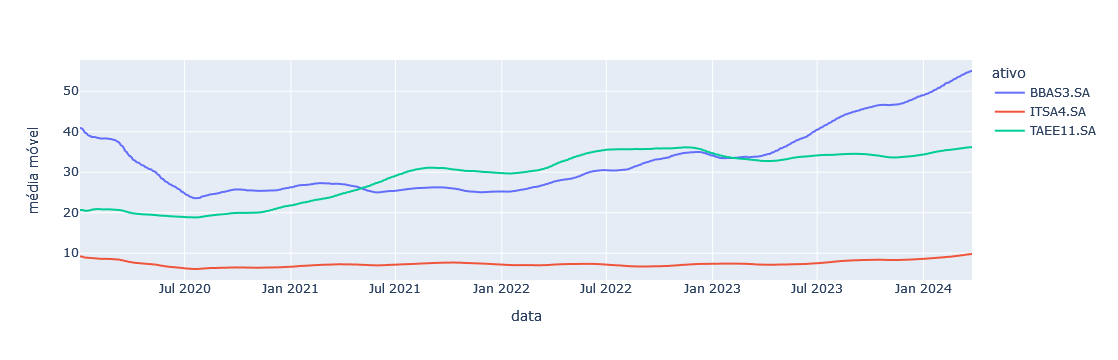

In [9]:
va_fecha_vertical = va_fecha_media.stack().reset_index()
va_fecha_vertical.columns = ['data', 'ativo', 'média móvel']

fig = px.line(va_fecha_vertical, x="data", y="média móvel", color='ativo')
fig.show()

4. Monte um gráfico de linhas para os desvios padrão em janela móvel


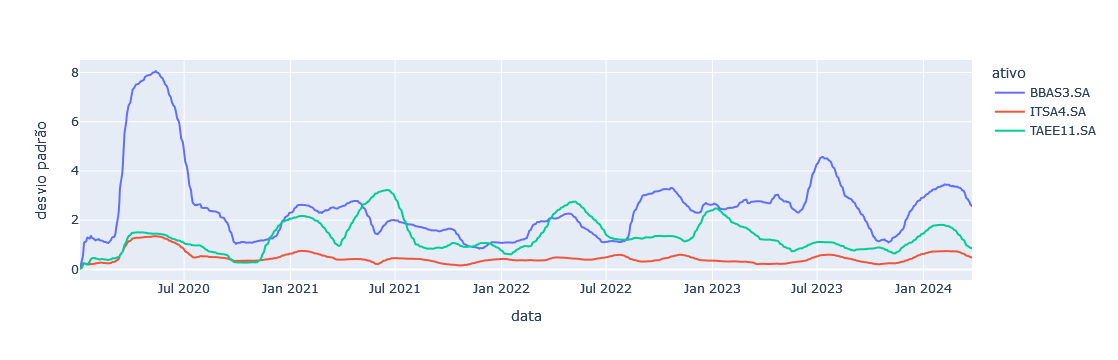

In [10]:
va_fecha_vertical_dp = va_fecha_dp.stack().reset_index()
va_fecha_vertical_dp.columns = ['data', 'ativo', 'desvio padrão']

fig = px.line(va_fecha_vertical_dp, x="data", y="desvio padrão", color='ativo')
fig.show()

5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

É observado que ambos apresentam comportamento diferenciado no que diz respeito a varição dos ativos, tomando como exeplo o ativo BBAS3.SA, no gráfico em que se tem a média móvel nota-se que na primeira faixa de tempo que é até 2021 há uma queda da variação, pra logo em seguida haver uma relativa estabilidade, seguinda com aumento da variação para as demais janelas, 2021 -> 2022 -> 2023 -> 2024. Quanto ao gráfico que representa a o desvio padrão o referido ativo, para primeira faixa, apresenta uma súbita elevação seguida de um abupto declínio, comportalmento que é obsrvado ao longo do tempo, até 2024. 

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [25]:
# Selecionar o período dos últimos 60 dias (corridos) para o ativo BBAS3.SA
lista_indicadores = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
bb_60 = ma.loc[:, (lista_indicadores, 'BBAS3.SA')].iloc[-60:]
bb_60

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BBAS3.SA,BBAS3.SA,BBAS3.SA,BBAS3.SA,BBAS3.SA,BBAS3.SA
Date,,,,,,
2023-12-27,54.261524,54.860001,54.970001,54.580002,54.799999,3372500
2023-12-28,54.785740,55.389999,55.389999,54.689999,54.860001,5840400
2024-01-02,54.162609,54.759998,55.279999,54.450001,55.119999,8170500
2024-01-03,54.212070,54.810001,55.070000,54.500000,54.680000,8148400
2024-01-04,53.638393,54.230000,54.900002,54.119999,54.750000,8099900
2024-01-05,54.281303,54.880001,55.130001,54.000000,54.180000,8227900
2024-01-08,54.746174,55.349998,55.480000,54.779999,55.049999,9053800
2024-01-09,53.925232,54.520000,55.150002,54.279999,55.090000,7683800


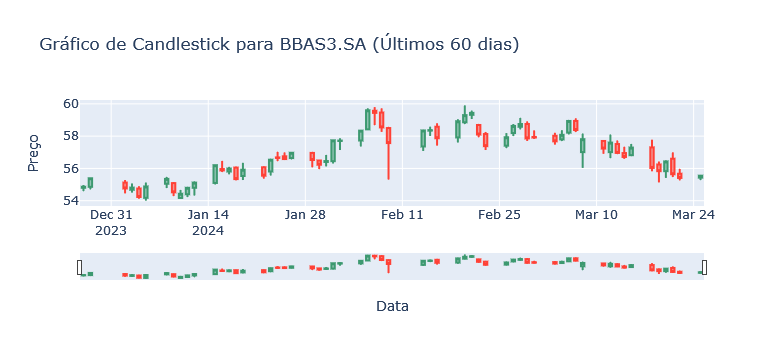

In [38]:
import plotly.graph_objects as go


# Removendo a segunda linha do cabeçalho

# Criando o gráfico de candlestick
fig = go.Figure(data=[go.Candlestick(x=bb_60.index,
                open=bb_60['Open'],
                high=bb_60['High'],
                low=bb_60['Low'],
                close=bb_60['Close'])])

# Personalizando o layout do gráfico
fig.update_layout(title='Gráfico de Candlestick para BBAS3.SA (Últimos 60 dias)',
                   xaxis_title='Data',
                   yaxis_title='Preço')

# Exibindo o gráfico
fig.show()
